# Project: E-Commerce Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul> 
       <li><a href="#read">Reading and Exploring Data From source</a></li>  
      <li><a href="#remove">Removing nulls and duplicates</a></li>
      <li><a href="#neg">Filtering dataset to neglect negative values</a></li> 
      <li><a href="#changedata">Changing datatypes </a></li> 
       <li><a href="#add">Adding new columns </a></li> 
       <li><a href="#edit">Editting the Country Column  </a></li>  
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
     <li><a href="#Q1">Q1:Which countries made the most orders?and which country made the highest sales?
     <li><a href="#Q2"> Q2: Which item was sold the most? and which items made the highest sales?
     <li><a href="#Q3"> Q3: Which Customer made the most purchases? and which customer spent the most? 
     <li><a href="#Q4">Q4:Which year had the most sales? and which month in that year?
    </ul>   
         
<li><a href="RFM">RFM Analysis and Customer Segmentation</a></li>     
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook we will be using some python libraries to analyze data on actualtransactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retailer. The company mainly sells unique all-occasion gifts.  . The main target the business wants to reach is to create a new customer segmentation based on customers purchases by a marketing technique called RFM analysis (Recency,Frequence,Monetary).

This dateset is brought by [kaggle](https://www.kaggle.com/code/vincentvaseghi/e-commerce-data-analysis-customer-segmentation).

<a id='wrangling'></a>
## Data Wrangling

<a id='read'></a>

### Reading and Exploring data from source:

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df=pd.read_csv('data.csv',encoding = 'ISO-8859-1')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


*We have 8 columns and 541909 rows*

**InvoiceNo**: The invoice number of each order ,type: string, we shall leave it as it is(Identifier)

**StockCode**: Item code,type: string. We shall leave it as it is- Identifiers and it has both letters and numbers.

**Description**: Product Name, type: String

**Quantity**: the quantity of the item purchased. type: int64

**InvoiceDate**: Date of transaction. type: String. *Needs to be changed to datetime format*

**UnitPrice**: product price per unit. type:float. 

**CustomerID**: Customer Identifier, type: float *Needs to be changed to intger and then to a string*

**Country**: Country of the customer.Type :string

*I would suggest adding a new column called **TotalItemsPrice**,which is equal to the(unit price * quantity)*

*We can also add month and year column to help in furthur analysis*

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have 1454 nulls in Description 

We have 135080 nulls in CustomerID, we shall remove those nulls as they would have a great impact on our analysis.


In [5]:
df.duplicated().sum()

5268

We have 5268 rows that are duplicated and must be removed before analysing data 

In [6]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

The minimum quantity is negative value. This needs to fixed and removed from our dataset

In [7]:
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

The minimum UnitPrice is a negative number. This also needs to be fixed and removed from our dataset

In [8]:
df['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

Nothing needs to be removed from CustomerID except the nulls. 

In [9]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

We have Unspecified countries and European Community, both can be removed from our dataset as they don't mention a specific country.
Eire means Ireland, and RSA means the Republic of South Africa. We can change both of them to make it easier in reading our 
analysis. 

<a id='remove'></a>

### Removing nulls and duplicates:

In [10]:
#Removing nulls in CustomerID column

null_index=list(df[df['CustomerID'].isnull()==True].index) #Creating a list with the index number of null values

df.drop(null_index,axis=0,inplace=True) #droppnig these indicies from our dataset

df.isnull().sum() #doublechecking that we have no nulls in ourdataset

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

The null values in Description have been removed as well. This is great as we do not have any nulls in our dataset anymore. 

In [11]:
#Removing duplicated values
df.drop_duplicates(inplace=True)

#Making sure that we do not have anymore duplicated values
df.duplicated().sum()

0

<a id='neg'></a>

### Filtering dataset to neglect negative values:

In [12]:
#Filtering dataset with quantity more than 0 as well as the unitprice 

df=df.query('Quantity>0 & UnitPrice>0')

In [13]:
#Making sure that our dataset is filtered correctly

df['Quantity'] .min()

1

In [14]:
#Next step, to ensure our dataset is filtered correctly

df['UnitPrice'].min()

0.001

<a id='change'></a>

### Changing Datatypes:

In [15]:
#Change InvoiceDate from string to Datetime

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

#Change CustomerID from float to int

df['CustomerID']=df['CustomerID'].astype(int)

#Change CustomerID from int to str

df['CustomerID']=df['CustomerID'].astype(str)

<a id='add'></a>

### Adding new columns:

In [16]:
#Adding total price column

df['TotalItemsPrice']= df['Quantity']*df['UnitPrice']

#Adding month column

df['Month']=df['InvoiceDate'].dt.month_name()

#Adding Year column

df['Year']=df['InvoiceDate'].dt.year


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalItemsPrice,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December,2010


<a id='edit'></a>

### Editing the Country column:

In [18]:
#First we will remove unneccessary country names

drop_countries=['Unspecified','European Community']  #Creating a list with the names we want to remove from our dataset

drop_countries_index=list(df.query('Country ==@drop_countries').index) #Creating another list with the row index numbers to be removed 

df.drop(drop_countries_index,axis=0,inplace=True)


In [19]:
#Second replacing some country names to make it easier to read

df.replace(to_replace=['EIRE','RSA'],value=['Ireland','South Africa'],inplace=True)

In [20]:
#Making sure we have editted everything we need from our 
df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
Ireland                   7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
South Africa                57
Lebanon                     45
Lithuania                   35
Brazil                      32
Czech Re

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392391 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        392391 non-null  object        
 1   StockCode        392391 non-null  object        
 2   Description      392391 non-null  object        
 3   Quantity         392391 non-null  int64         
 4   InvoiceDate      392391 non-null  datetime64[ns]
 5   UnitPrice        392391 non-null  float64       
 6   CustomerID       392391 non-null  object        
 7   Country          392391 non-null  object        
 8   TotalItemsPrice  392391 non-null  float64       
 9   Month            392391 non-null  object        
 10  Year             392391 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 35.9+ MB


*Our dataset is clean and we are now ready to preform analysis on this dataset*

<a id='eda'></a>

## EDA(Exploratary Data Analysis)


<a id='Q1'></a>

### Q1:Which countries made the most orders?and which country made the highest sales?

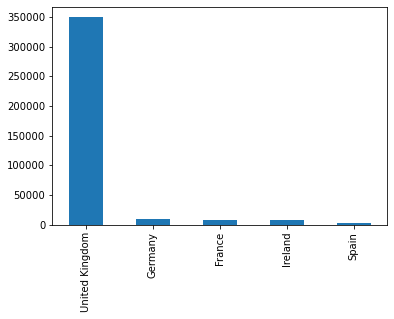

In [22]:
#Top 5 countries with most orders 

df['Country'].value_counts()[:5].plot(kind='bar');

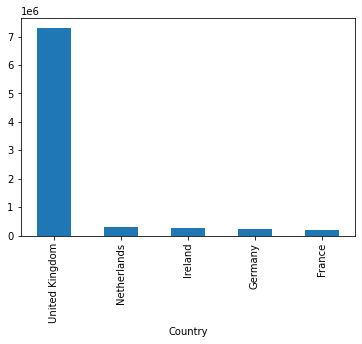

In [23]:
#Top 5 countries that had highest sales

df.groupby('Country')['TotalItemsPrice'].sum().sort_values(ascending=False)[:5].plot(kind='bar');

<a id='Q2'></a>

### Q2: Which item was sold the most? and which items made the highest sales?

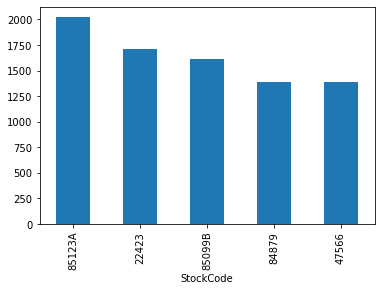

In [24]:
df.groupby('StockCode')['Quantity'].count().sort_values(ascending=False)[:5].plot(kind='bar');

In [25]:
df.query('StockCode=="85123A"')['Description'][0]

'WHITE HANGING HEART T-LIGHT HOLDER'

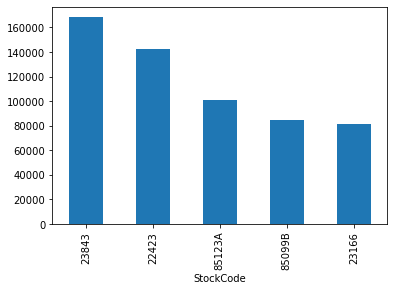

In [26]:
df.groupby('StockCode')['TotalItemsPrice'].sum().sort_values(ascending=False)[:5].plot(kind='bar');

In [27]:
df.query('StockCode=="23843"')['Description']

540421    PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object

In [28]:
df.query('StockCode=="23843"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalItemsPrice,Month,Year
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,December,2011


<a id='Q3'></a>

### Q3: Which Customer made the most purchases? and which customer spent the most? 

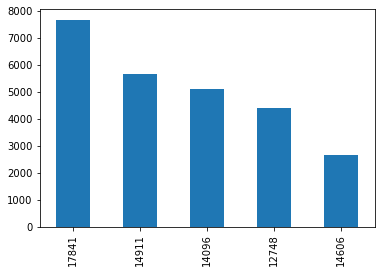

In [29]:
df['CustomerID'].value_counts()[:5].plot(kind='bar');

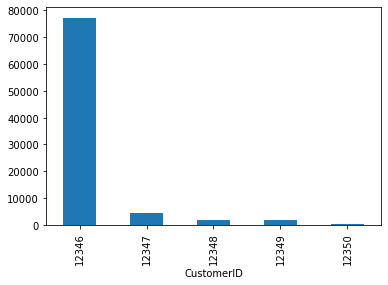

In [30]:
df.groupby('CustomerID')['TotalItemsPrice'].sum()[:5].sort_values(ascending=False).plot(kind='bar');

<a id='Q4'></a>

### Q4:Which year had the most sales? and which month in that year?

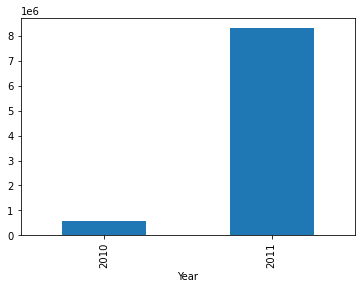

In [31]:
df.groupby('Year')['TotalItemsPrice'].sum().plot(kind='bar');

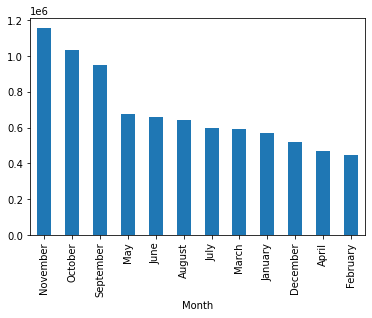

In [32]:
df[df['Year']==2011].groupby('Month')['TotalItemsPrice'].sum().sort_values(ascending=False).plot(kind='bar');

<a id='RFM'></a>

## RFM Analysis and Customer Segmentation

#### What is RFM (recency, frequency, monetary) analysis?

>RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

**RFM analysis ranks each customer on the following factors:**

 **Recency**. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

 **Frequency**. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

 **Monetary**. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.
 
 **After performing the RFM analysis we shall divide our customers into the following groups:**
 
   **Best Customers** Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.
   
   **Loyal Customers** Customers who buy the most often from your store.
   
   **Whales** Highest Paying Customers, Customers who have generated the most revenue for your store.
    
   **Promising** Customers who return often, but do not spend a lot.
   
   **Rookies** Newest Customers
   
   **Slipping** Once loyal,now gone customers
   
  

In [33]:
#Creating a new dataframe to add our RFM scores to

df_RFM=df[['CustomerID']].copy()


In [34]:
"""
To calculate Recency

As it turns out that 2011 has records from January till December. 
Our aim is to give each customer a score out of 5 for how recent their last purchase was

5- if a customer made the last purhchase from October till December 2011
4-if a cusotmer made their last purchase from July till September 2011
3- if a customer made their last purchase from April till June 2011
2- if a customer made their last purchase from January till March 2011
1- if a customer made their last purchase last year in 2010
"""

def recency(year,month):
    if (year==2011) & (month in ['October','November','December']):
        
            rec_score=5
            
    elif (year ==2011) & (month in ['July','August','September']):
        
            rec_score=4
            
    elif (year== 2011) & (month in ['April','May','June']):
        
            rec_score=3
            
    elif (year== 2011) & (month in ['January','February','March']):
        
            rec_score=2
            
    elif (year==2010):
        
        rec_score=1
        
    return rec_score

#Creating a list of years and months

years=list(df['Year'].values)
months=list(df['Month'].values)

#Creating a new list of scores and using our new function
scores=[]
for year,month in zip(years,months):
        score= recency(year,month)
        scores.append(score)

#Adding list of scores to our new dataframe
df_RFM['Rec_Score']=scores


In [35]:
#Each ID has more than one record so we will to filter our dataset to have only one ID per record

df_RFM.head()

,CustomerID,Rec_Score
0,17850,1
1,17850,1
2,17850,1
3,17850,1
4,17850,1


In [36]:

unique_IDS= list(df['CustomerID'].unique()) #getting a list with unique IDS
indexes=[] #creating a list of indexes

for ID in unique_IDS:
    #Since our dataframe is sorted according to purchase date then we only need to find the score of the latest purchase
    #So we will find the index number of the last entry of this ID
    index= df_RFM[df_RFM['CustomerID']==ID].index[-1]
    indexes.append(index)


In [37]:
df_RFM=df_RFM.loc[indexes] #Filtering our dataframe

In [38]:
df_RFM.head()

,CustomerID,Rec_Score
4544,17850,1
448287,13047,5
532936,12583,5
325961,13748,4
50848,15100,2


In [39]:
"""
To calculate Frequency:

Now we want to know how many times did each customer do a purhcase and give them a score out of 5.
In order to find this we must know a figure of how frquently do customer doa purchase.
As we only have data foor 2010 and 2011, so we will calculating the frequency in this period

"""
df['CustomerID'].value_counts().describe()

count    4333.000000
mean       90.558735
std       225.630999
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: CustomerID, dtype: float64

In [40]:
"""

As it shows the maximum is 7676
75% is 98
50% is 41
25% is 17
the minimum is 1 
and the mean is 90

if frequency of purchase is more than 1000 the score is 5
if frequency of purchase is between 1000 and 90 the score is 4
if frequency of purhcase is between 90 and 41 the score is 3
if frequncy of purchase is between 41 and 17 the score is 2
if frequency of purchase is less than 17 the score is 1  
"""
CustomerID=df.CustomerID.value_counts().index
Frequency=df.CustomerID.value_counts().values

score_list=[]

for value in Frequency:
    if value >= 1000:
        score=5
    elif value < 1000 and value >=90:
        score=4
    elif value < 90 and value >=41:
        score=3
    elif value < 41 and value >=17:
        score=2
    elif value < 17:
        score=1
    score_list.append(score)

In [41]:
dict = {'CustomerID': CustomerID,'Freq_score': score_list}
df_freq=pd.DataFrame(dict)

In [42]:
df_freq.head()

,CustomerID,Freq_score
0,17841,5
1,14911,5
2,14096,5
3,12748,5
4,14606,5


In [43]:
#Adding Frequency scores to RFM dataframe 

df_RFM=pd.merge(df_RFM,df_freq,on='CustomerID',how='inner')


In [44]:
df_RFM.head()

,CustomerID,Rec_Score,Freq_score
0,17850,1,4
1,13047,5,4
2,12583,5,4
3,13748,4,2
4,15100,2,1


In [45]:
"""
To Calculate Monetary we will want to know how much did a customer pay in a given period

We have already calculated it before on a chart but we want to add scores accordingly. So first we will need 
to know find out more of total purchases of each customer

"""
df.groupby('CustomerID')['TotalItemsPrice'].sum().describe()

count      4333.000000
mean       2050.137982
std        8990.306118
min           3.750000
25%         306.450000
50%         668.580000
75%        1660.900000
max      280206.020000
Name: TotalItemsPrice, dtype: float64

In [46]:
"""
Customers who spent more than 10,000 get a score of 5
Customers who spent between 10,000 and 5000 get a score of 4
Customers who spent between 5000 and 1000 get a score of 3
Customer who spent between 1000 and 500 get a score of 2
Customers who spent less than 500 get a score of 1 
"""

score_list1=[]
values=list(df.groupby('CustomerID')['TotalItemsPrice'].sum().values)
customerid=list((df.groupby('CustomerID')['TotalItemsPrice'].sum().index))

for value in values:
    if value >= 10000:
        score1=5
    elif value < 10000 and value>=5000:
        score1=4
    elif value < 5000 and value >=1000:
        score1=3
    elif value < 1000 and value >=500:
        score1=2
    elif value <500:
        score1=1
    score_list1.append(score1)    

In [47]:
dict1 = {'CustomerID': customerid,'Mon_score': score_list1}

df_mon=pd.DataFrame(dict1)


In [48]:
df_RFM= pd.merge(df_RFM,df_mon,on='CustomerID',how='inner')

In [49]:
df_RFM.head()

,CustomerID,Rec_Score,Freq_score,Mon_score
0,17850,1,4,4
1,13047,5,4,3
2,12583,5,4,4
3,13748,4,2,2
4,15100,2,1,2


In [50]:
"""
We shall divide our customers to six segments.

We will create a function that takes the 3 scores from our dataframe and categorizes which segment the customer belongs
to 
the function then returns the customer segment that we shall later add to our dataframe
"""

def segmentation(rec_score,freq_score,mon_score): 

    if (rec_score==5) & (freq_score==5)& (mon_score==5):
        
        segment='Best Customers'
        
    elif (freq_score in (4,5)) &(mon_score in(5,4)):
        
        segment='Loyal Customer'

    elif (mon_score in(5,4)):
        
        segment='Whales'
    
    elif (freq_score in (5,4)) & (mon_score in (1,2,3)):
        
        segment='Promising Customers'
        
    elif (rec_score in(5,4))& (freq_score in(1,2,3)):
        
        segment='Rookies'
        
    elif (rec_score in(1,2,3))&(freq_score in(1,2,3)):
        segment='Slipping'
        
    elif (rec_score in (5,4,3,2,1)) & (freq_score in (5,4,3,2,1)) & (mon_score in (5,4,3,2,1)):
        segment=' No Segment'
    return segment 

In [51]:
segmentation(1,4,4)

'Loyal Customer'

In [52]:
rec_scores=list(df_RFM['Rec_Score'].values)
freq_scores=list(df_RFM['Freq_score'].values)
mon_scores=list(df_RFM['Mon_score'].values)

customer_segment=[]
for rec_score,freq_score,mon_score in zip(rec_scores,freq_scores,mon_scores):
    segment=segmentation(rec_score,freq_score,mon_score)
    customer_segment.append(segment)
    
df_RFM['Customer_Segment']=customer_segment

In [53]:
df_RFM.head()

,CustomerID,Rec_Score,Freq_score,Mon_score,Customer_Segment
0,17850,1,4,4,Loyal Customer
1,13047,5,4,3,Promising Customers
2,12583,5,4,4,Loyal Customer
3,13748,4,2,2,Rookies
4,15100,2,1,2,Slipping


In [56]:
#Saving both dataframes to an excel file

#with pd.ExcelWriter('RFMAnalysis.xlsx') as writer:
    #df.to_excel(writer, sheet_name='RawCleanData',index=False)
    #df_RFM.to_excel(writer, sheet_name='RFM',index=False)